In [ ]:
!pip install -q imbalanced-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt     #2154901040
import pandas as pd
import seaborn as sn

In [ ]:
df=pd.read_csv("/content/5-online_course_engagement_data.csv") #2154901040
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [ ]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [ ]:
df.dtypes

,0
UserID,int64
CourseCategory,object
TimeSpentOnCourse,float64
NumberOfVideosWatched,int64
NumberOfQuizzesTaken,int64
QuizScores,float64
CompletionRate,float64
DeviceType,int64
CourseCompletion,int64


In [ ]:
df.isnull().sum()

,0
UserID,0
CourseCategory,0
TimeSpentOnCourse,0
NumberOfVideosWatched,0
NumberOfQuizzesTaken,0
QuizScores,0
CompletionRate,0
DeviceType,0
CourseCompletion,0


In [ ]:
# Raw count
print(df['CourseCompletion'].value_counts())
                                                                      #2154901040
# Percentage
print(df['CourseCompletion'].value_counts(normalize=True) * 100)


CourseCompletion
0    5432
1    3568
Name: count, dtype: int64
CourseCompletion
0    60.355556
1    39.644444
Name: proportion, dtype: float64


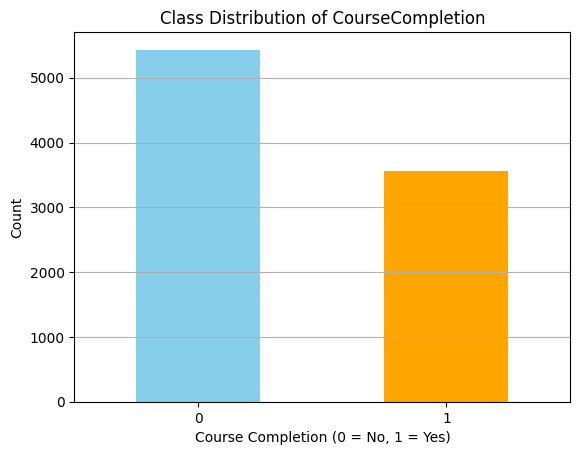

In [ ]:


df['CourseCompletion'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution of CourseCompletion")
plt.xlabel("Course Completion (0 = No, 1 = Yes)")                                       #2154901040
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
df.isnull().sum()

,0
UserID,0
CourseCategory,0
TimeSpentOnCourse,0
NumberOfVideosWatched,0
NumberOfQuizzesTaken,0
QuizScores,0
CompletionRate,0
DeviceType,0
CourseCompletion,0


In [ ]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

print(x)

[[5618 'Health' 29.97971935 ... 50.36565595 20.86077271 1]
 [4326 'Arts' 27.80263951 ... 62.61596979 65.63241524 1]
 [5849 'Arts' 86.8204847 ... 78.4589624 63.81200659 1]
 ...
 [6323 'Health' 38.21251152 ... 69.50829722 70.18815868 1]
 [3652 'Health' 70.04866546 ... 79.65518249 72.97522521 1]
 [5595 'Health' 93.58978113 ... 56.27454591 11.29907109 0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()                                                                #2154901040
df['CourseCategory']=le.fit_transform(df['CourseCategory'])
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,2,29.979719,17,3,50.365656,20.860773,1,0
1,4326,0,27.802640,1,5,62.615970,65.632415,1,0
2,5849,0,86.820485,14,2,78.458962,63.812007,1,1
3,4992,4,35.038427,17,10,59.198853,95.433162,0,1
4,3866,3,92.490647,16,0,98.428285,18.102478,0,0


In [ ]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
print(y)

[0 0 1 ... 0 1 0]


#Using Bulit-In Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)      #2154901040

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)                            #2154901040

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(class_weight="balanced",solver='liblinear', max_iter=500,random_state=0)  #2154901040
classifier.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=0,
                   solver='liblinear')

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy:",accuracy_score(y_test,y_pred))                  #2154901040
print("F1_Score:",f1_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("Report:",classification_report(y_test,y_pred))

[[876 228]
 [134 562]]
Accuracy: 0.7988888888888889
F1_Score: 0.756393001345895
Precision: 0.7113924050632912
Recall: 0.8074712643678161
Report:               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1104
           1       0.71      0.81      0.76       696

    accuracy                           0.80      1800
   macro avg       0.79      0.80      0.79      1800
weighted avg       0.81      0.80      0.80      1800



In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
print("\n=== Cross-Validation Results (Sklearn) ===")

print("CV Accuracy:",cross_val_score(classifier,x,y,cv=skf,scoring="accuracy").mean())     #2154901040
print("CV F1-Score:",cross_val_score(classifier,x,y,cv=skf,scoring="f1").mean())
print("CV Precision:",cross_val_score(classifier,x,y,cv=skf,scoring="precision").mean())
print("CV Recall:",cross_val_score(classifier,x,y,cv=skf,scoring="recall").mean())



=== Cross-Validation Results (Sklearn) ===
CV Accuracy: 0.7902222222222223
CV F1-Score: 0.7509855233707364
CV Precision: 0.7091934278971095
CV Recall: 0.7984869228590312


#Using Stats_Api Model

In [ ]:
import statsmodels.api as sm               #2154901040

In [ ]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,2,29.979719,17,3,50.365656,20.860773,1,0
1,4326,0,27.802640,1,5,62.615970,65.632415,1,0
2,5849,0,86.820485,14,2,78.458962,63.812007,1,1
3,4992,4,35.038427,17,10,59.198853,95.433162,0,1
4,3866,3,92.490647,16,0,98.428285,18.102478,0,0


In [ ]:
df_encoded = pd.get_dummies(df, columns=['CourseCategory'], drop_first=True)

In [ ]:
df_encoded.head()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_1,CourseCategory_2,CourseCategory_3,CourseCategory_4
0,5618,29.979719,17,3,50.365656,20.860773,1,0,False,True,False,False
1,4326,27.802640,1,5,62.615970,65.632415,1,0,False,False,False,False
2,5849,86.820485,14,2,78.458962,63.812007,1,1,False,False,False,False
3,4992,35.038427,17,10,59.198853,95.433162,0,1,False,False,False,True
4,3866,92.490647,16,0,98.428285,18.102478,0,0,False,False,True,False


In [ ]:
X=df_encoded[['UserID', 'CourseCategory_1','CourseCategory_2','CourseCategory_3','CourseCategory_4','TimeSpentOnCourse',
                        'NumberOfVideosWatched', 'NumberOfQuizzesTaken',
                        'QuizScores', 'CompletionRate', 'DeviceType']]                     #2154901040
y=df_encoded['CourseCompletion']
X[['CourseCategory_1', 'CourseCategory_2', 'CourseCategory_3', 'CourseCategory_4']] = X[['CourseCategory_1', 'CourseCategory_2', 'CourseCategory_3', 'CourseCategory_4']].astype(int)

/tmp/ipython-input-21-1610029566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['CourseCategory_1', 'CourseCategory_2', 'CourseCategory_3', 'CourseCategory_4']] = X[['CourseCategory_1', 'CourseCategory_2', 'CourseCategory_3', 'CourseCategory_4']].astype(int)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_sm = sm.add_constant(X_scaled)
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit()              #2154901040
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.440436
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       CourseCompletion   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8988
Method:                           MLE   Df Model:                           11
Date:                Mon, 23 Jun 2025   Pseudo R-squ.:                  0.3441
Time:                        03:21:57   Log-Likelihood:                -3963.9
converged:                       True   LL-Null:                       -6043.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7037      0.029    -23.950      0.000      -0.761      -0.646
x1             0.0755      0.

In [ ]:
y_pred_prob = result.predict(X_sm)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))                                  #2154901040
print("Recall:", recall_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.7975555555555556
F1 Score: 0.7345571095571095
Precision: 0.7648665048543689
Recall: 0.7065582959641256
Confusion Matrix:
 [[4657  775]
 [1047 2521]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      5432
           1       0.76      0.71      0.73      3568

    accuracy                           0.80      9000
   macro avg       0.79      0.78      0.79      9000
weighted avg       0.80      0.80      0.80      9000



In [ ]:
logit_cv = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
print("\n=== 10-Fold Cross-Validation (Sklearn) ===")
print("CV Accuracy:", cross_val_score(logit_cv, X_scaled, y, cv=skf, scoring='accuracy').mean())
print("CV F1 Score:", cross_val_score(logit_cv, X_scaled, y, cv=skf, scoring='f1').mean())                  #2154901040
print("CV Precision:", cross_val_score(logit_cv, X_scaled, y, cv=skf, scoring='precision').mean())
print("CV Recall:", cross_val_score(logit_cv, X_scaled, y, cv=skf, scoring='recall').mean())



=== 10-Fold Cross-Validation (Sklearn) ===
CV Accuracy: 0.791
CV F1 Score: 0.7516161506649566
CV Precision: 0.7107391734174546
CV Recall: 0.7979329934220879


#After Droping the cloumn

In [ ]:
X1=df_encoded[['CourseCategory_2','TimeSpentOnCourse',
                        'NumberOfVideosWatched', 'NumberOfQuizzesTaken',
                        'QuizScores', 'CompletionRate',]]                 #2154901040
y1=df_encoded['CourseCompletion']
X1[['CourseCategory_2']]= X1[['CourseCategory_2']].astype(int)

/tmp/ipython-input-28-1516620932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[['CourseCategory_2']]= X1[['CourseCategory_2']].astype(int)


In [ ]:
X1.describe()

,CourseCategory_2,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.202333,50.163822,10.024667,5.090556,74.706028,50.340146
std,0.401762,28.491750,6.029878,3.157762,14.378383,28.950977
min,0.000000,1.005230,0.000000,0.000000,50.005119,0.009327
25%,0.000000,25.440548,5.000000,2.000000,62.283451,25.653614
50%,0.000000,49.818417,10.000000,5.000000,74.743294,50.264124
75%,0.000000,75.069924,15.000000,8.000000,87.022663,75.572493
max,1.000000,99.992558,20.000000,10.000000,99.994984,99.979711


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [ ]:
X_sm = sm.add_constant(X_scaled)
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit()               #2154901040
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.440952
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       CourseCompletion   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8993
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Jun 2025   Pseudo R-squ.:                  0.3434
Time:                        03:21:59   Log-Likelihood:                -3968.6
converged:                       True   LL-Null:                       -6043.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7018      0.029    -23.916      0.000      -0.759      -0.644
x1            -0.0881      0.

In [ ]:
y_pred_prob = result.predict(X_sm)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))                                         #2154901040
print("Recall:", recall_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.799
F1 Score: 0.736642888338914
Precision: 0.7664344138139958
Recall: 0.7090807174887892
Confusion Matrix:
 [[4661  771]
 [1038 2530]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      5432
           1       0.77      0.71      0.74      3568

    accuracy                           0.80      9000
   macro avg       0.79      0.78      0.79      9000
weighted avg       0.80      0.80      0.80      9000



In [ ]:
logit_cv = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score
print("Accuracy:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))                                   #2154901040
print("Recall:", recall_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.799
F1 Score: 0.736642888338914
Precision: 0.7664344138139958
Recall: 0.7090807174887892
Confusion Matrix:
 [[4661  771]
 [1038 2530]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      5432
           1       0.77      0.71      0.74      3568

    accuracy                           0.80      9000
   macro avg       0.79      0.78      0.79      9000
weighted avg       0.80      0.80      0.80      9000



In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
y1_proba = result.predict(X_sm)
fpr, tpr, _ = roc_curve(y1, y1_proba)            #2154901040
auc_score = roc_auc_score(y1, y1_proba)
print(auc_score)

0.8700744467265895


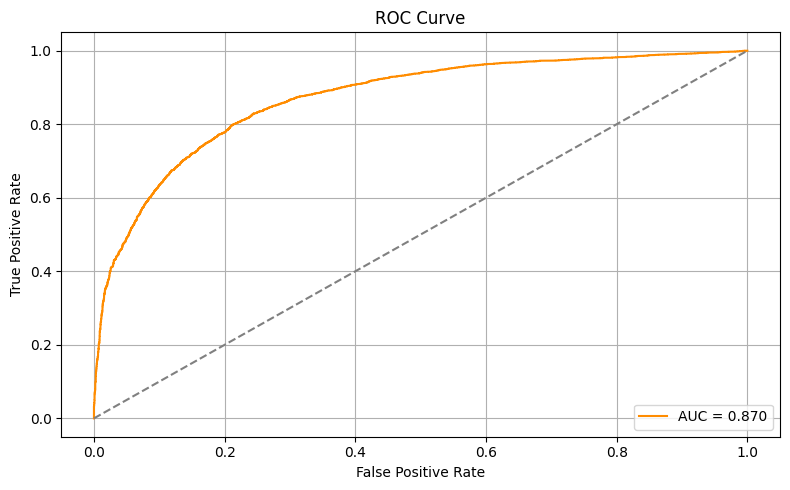

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")                             #2154901040
plt.grid(True)
plt.tight_layout()
plt.show()